# 自由振動のモデル

吉田勝俊（宇都宮大学）

## 参考情報

- [Pythonで運動方程式を解く(odeint) - Qiita](https://qiita.com/binaryneutronstar/items/ad5efa27fd626826846f)
- [[Python] Numpyの参照、抽出、結合 - Qiita](https://qiita.com/supersaiakujin/items/d63c73bb7b5aac43898a)
- [[Python/matplotlib] FuncAnimationを理解して使う - Qiita](https://qiita.com/osanshouo/items/3c66781f41884694838b)

In [1]:
import numpy as np                              #数値計算ライブラリ
from numpy.linalg import norm                   #ベクトルのノルム
from scipy.integrate import odeint              #常微分方程式ライブラリ
import matplotlib.pyplot as plt                 #描画ライブラリ
from matplotlib import rc                       #グラフ調整ライブラリ
#Colab用の設定（グラフィックのインライン表示）
%matplotlib inline

## 自由振動系の運動方程式

In [2]:
def EOM(x, t, param):
    '''
    自由振動系の運動方程式を表す関数（１階化したもの）
    '''
    x1, x2  = x      #状態ベクトルの成分
    m, c, k = param  #パラメータの成分
    dxdt = np.array([
        x2,
        (-c*x2 - k*x1)/m,
    ])
    
    return dxdt

## 数値解

In [3]:
def Solve(eom, param, x0, time):
    '''
    自由振動系の数値解を求める関数
    '''

    ###運動方程式を数値的に解く
    motion = odeint(
        eom,            #運動方程式を表すユーザ関数
        x0,             #初期条件
        time,           #時間軸を表す数列
        args=(param,)  #運動方程式の係数
    )
  
    return motion

### 数値解を求める

* パラメータ　$m=1$, $c=0.2$, $k=1$
* 初期条件　$x(0)=2$, $\dot x(0)=0$ （引っ張って止めた状態）

初期条件をベクトルで表す．2だけ引っ張って（変位＝２），停止（速度＝０）

In [4]:
X0 = [
    2,  #初期変位 
    0,  #初速度
]

print('x0 =', X0)

x0 = [2, 0]


パラメータをベクトルで表す．

In [5]:
Param = [
    1,    # m: 質量 
    0.2,  # c: 減衰係数
    1,    # k: ばね定数
]

print('Parameter =', Param)

Parameter = [1, 0.2, 1]


時間軸を表す等差数列はこんな感じ．

In [6]:
ts = np.linspace(0,20,100) #時間軸を表す数列（0〜20秒を100等分）
print('time =', ts)

time = [ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.3636

運動方程式の数値解はこんな感じ．（変位，速度）の２次元ベクトルが，時刻ごとに，縦に並んでいます．
これを*相軌道*と呼びました．

In [7]:
xs = Solve(eom=EOM, param=Param, x0=X0, time=ts)
print('motion = ', xs)

motion =  [[ 2.          0.        ]
 [ 1.95986839 -0.39329884]
 [ 1.84320004 -0.75534556]
 [ 1.65767649 -1.07294552]
 [ 1.41341977 -1.33519832]
 [ 1.12249239 -1.53384147]
 [ 0.79833964 -1.66347538]
 [ 0.45519882 -1.72166515]
 [ 0.10750042 -1.70892024]
 [-0.23071485 -1.62855764]
 [-0.5463403  -1.48645839]
 [-0.82768873 -1.29073166]
 [-1.06490213 -1.05130325]
 [-1.25027219 -0.77944798]
 [-1.37846246 -0.48728682]
 [-1.44662718 -0.18727024]
 [-1.45442603  0.10833122]
 [-1.40393852  0.38790886]
 [-1.29948531  0.64095246]
 [-1.14736716  0.85842569]
 [-0.95553539  1.033068  ]
 [-0.73320957  1.1596137 ]
 [-0.49045976  1.23492289]
 [-0.23777141  1.25802242]
 [ 0.01438905  1.23005893]
 [ 0.25599071  1.15416913]
 [ 0.47782075  1.03527603]
 [ 0.67181933  0.87982192]
 [ 0.83135522  0.6954514 ]
 [ 0.95143354  0.49065906]
 [ 1.02883009  0.27441716]
 [ 1.06214976  0.05579911]
 [ 1.05180974 -0.15638626]
 [ 0.99995107 -0.35393538]
 [ 0.91028506 -0.52955296]
 [ 0.78788318 -0.67710683]
 [ 0.638921   -0.7

## 数値解の可視化

### 数値解から成分を取り出す

In [8]:
x1s = xs[:,0]   #数値解の変位成分
x2s = xs[:,1]   #数値解の速度成分

### 変位の振動波形 $(t,x_1)$

Text(0, 0.5, '$x_1(t)$')

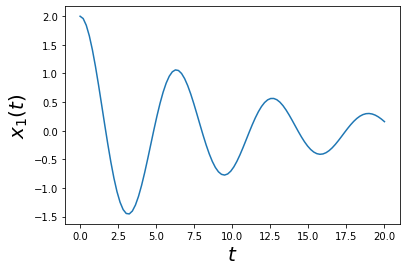

In [9]:
plt.plot(ts, x1s)
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$x_1(t)$', fontsize=20)

### 速度の振動波形 $(t,x_2)$

Text(0, 0.5, '$x_2(t)$')

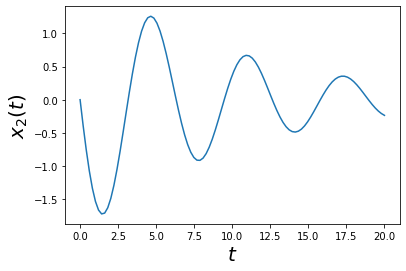

In [10]:
plt.plot(ts, x2s)
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$x_2(t)$', fontsize=20)

### 相軌道 $(x_1,x_2)$

Text(0, 0.5, '$x_2(t)$')

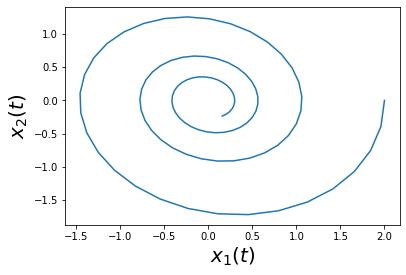

In [11]:
plt.plot(x1s, x2s)
plt.xlabel(r'$x_1(t)$', fontsize=20)
plt.ylabel(r'$x_2(t)$', fontsize=20)

### アニメーション

In [12]:
from matplotlib.animation import FuncAnimation  #アニメーションライブラリ

In [13]:
def animate_motion(x1s):
    '''
    自由振動系の運動をアニメーションする関数
    '''

    fig = plt.figure(               #キャンバスを設ける
        figsize=(2,3)  #幅, 高さ 
    )  
    ax = fig.add_subplot(1, 1, 1)   #グラフ用紙を作る

    w = 0.3 #描画する四角形の幅
    h = 0.2 #描画する四角形の高さ

    def each_frame(ti):
        '''
        パラパラマンガの1コマを描く関数
        '''
        ax.cla() #グラフをクリア

        #ti番目の時刻における変位    
        x1 = x1s[ti]  
        points = np.array([ #四角形を一筆書きするための点列
            [-w/2, x1-h/2],
            [-w/2, x1+h/2],
            [ w/2, x1+h/2],
            [ w/2, x1-h/2],
            [-w/2, x1-h/2],
        ])

        pxs = points[:,0] #点列のX成分だけの数列
        pys = points[:,1] #点列のY成分だけの数列
        
        #時刻tiの各質点の描画
        ax.plot(pxs, pys, '-', color='C1')

        ax.set_ylabel(r'$x_1$', fontsize=16)
        ax.set_xlim(-2,2)
        ax.set_ylim(-3,3)
        ax.grid()

        fig.tight_layout()

    anim = FuncAnimation(
        fig, each_frame, 
        interval=80, frames=len(x1s)
    )

    rc('animation', html='jshtml')
    return anim

次のセルを実行して，現れた図形の再生ボタンをクリックすると，動画が動きます．

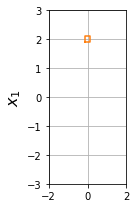

In [14]:
animate_motion(x1s) #若干時間を要します

## 演習2.6

同じ処理を繰り返すので，以上の処理を一括したユーザー関数を作っておきます．

In [15]:
def all_plot(eom, param, x0, time):
    '''
        数値解を求めて，全ての表示方法で表示する関数
    '''
    
    ### 数値解を求める
    xs = Solve(eom, param, x0, time)
    
    x1s = xs[:,0]   #数値解の変位成分
    x2s = xs[:,1]   #数値解の速度成分
    
    ### 振動波形を描く
    plt.figure(figsize=(8,3)) #新しいグラフ用紙
    plt.subplot(1,3,1) #グラフを1行3列表示の1番目
    plt.plot(time, x1s) #変位の振動波形
    plt.xlabel(r'$t$', fontsize=14)
    plt.ylabel(r'$x_1(t)$', fontsize=14)
    
    plt.subplot(1,3,2) #グラフを1行3列表示の1番目
    plt.plot(time, x2s) #速度の振動波形
    plt.xlabel(r'$t$', fontsize=14)
    plt.ylabel(r'$x_2(t)$', fontsize=14)
    
    ### 相軌道を描く
    plt.subplot(1,3,3) #グラフを1行3列表示の3番目
    plt.plot(x1s, x2s)
    plt.xlabel(r'$x_1(t)$', fontsize=14)
    plt.ylabel(r'$x_2(t)$', fontsize=14)
    
    plt.tight_layout() #レイアウト調整
    plt.show() #強制出力

    ### アニメーションする
    print('Generating animation (Please wait) ... ', end='')
    plt.figure() #新しいグラフ用紙
    anim = animate_motion(x1s)
    display(anim)


共通の設定（初期条件，時間軸）

In [16]:
# 初期条件を表すベクトル
x0 = [
    2,  #初期変位 
    0,  #初速度
]

# 時間軸を表す等差数列
ts = np.linspace(0,40,200) #ちょっと長めに0〜40秒を200等分

* もっと長時間観察したいときは，`linspace`の`40`を増やせばできます！
* その際，`200`を据え置くと，アニメーションが早回しになります．（単位時間当りのコマ数が減る）

### (1) 単振動（一定振幅で振動する）

* `m`, `c`, `k` の値を変更・調整して，再現してください．

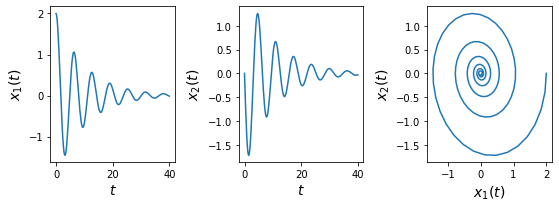

Generating animation (Please wait) ... 

<Figure size 432x288 with 0 Axes>

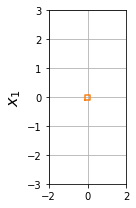

In [17]:
param = [
    1,   # m
    0.2, # c
    1,   # k
]

all_plot(EOM, param, x0, ts)

### (2) 減衰振動（振動しながら x = 0 に収束する）

* `m`, `c`, `k` の値を変更・調整して，再現してください．

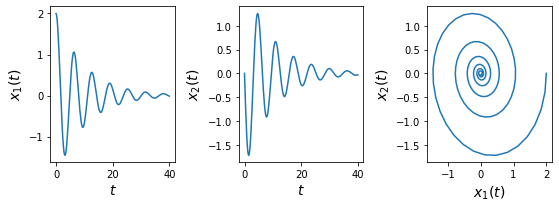

Generating animation (Please wait) ... 

<Figure size 432x288 with 0 Axes>

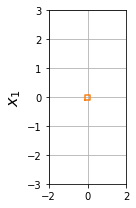

In [18]:
param = [
    1,   # m
    0.2, # c
    1,   # k
]

all_plot(EOM, param, x0, ts)

### (3) 無周期減衰運動（振動しないで x = 0 に収束する）

* `m`, `c`, `k` の値を変更・調整して，再現してください．

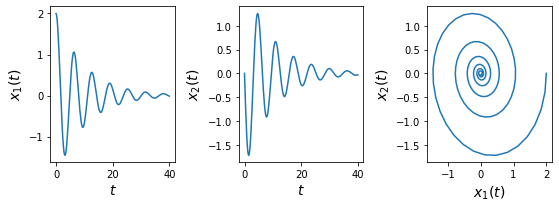

Generating animation (Please wait) ... 

<Figure size 432x288 with 0 Axes>

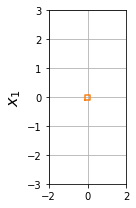

In [19]:
param = [
    1,   # m
    0.2, # c
    1,   # k
]

all_plot(EOM, param, x0, ts)

# 非線形振動の例

## 演習2.7

### 粘性減衰力の代わりにクーロン摩擦を受ける自由振動系

$m\ddot x + kx = F_{dri}(\dot x):=
\begin{cases}
 -\mu R & (\dot x>0)
 \\
 \mu R  & (\dot x<0)
 \\
 0     & (\dot x=0)
 \\
\end{cases}$

を1階化すると，

$\begin{cases}
 \dot x_1 = x_2
 \\
 \dot x_2 =  -(k/m)x_1 + F_{dri}(x_2)/m 
\end{cases}$

In [20]:
def EOM_dri(x, t, param):
    '''
    クーロン摩擦を受ける自由振動系の運動方程式を表す関数（１階化したもの）
    '''
    x1, x2      = x       #状態ベクトルの成分
    m, k, mu, R = param   #パラメータの成分

    def F_dri(dxdt, mu, R):
        '''
        クーロン摩擦を表す関数
        '''
        if dxdt > 0:
            F = -mu*R
        elif dxdt < 0:
            F = mu*R
        else:
            F = 0
            
        return F
    
    dxdt = np.array([
        x2,
        ( - k*x1 + F_dri(x2, mu, R) )/m,
    ])
    
    return dxdt

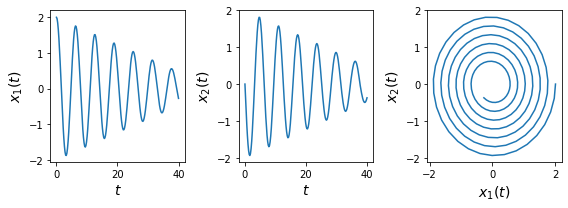

Generating animation (Please wait) ... 

<Figure size 432x288 with 0 Axes>

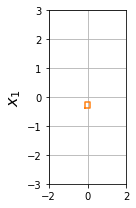

In [21]:
# 初期条件を表すベクトル
x0 = [
    2,  #初期変位 
    0,  #初速度
]

# パラメータを表すベクトル
param = [
    1,   # m
    1,   # k
    0.3, # mu
    0.2, # R
]

# 時間軸を表す等差数列
ts = np.linspace(0,40,200) #ちょっと長めに0〜40秒を200等分

# 数値解を求めて表示
all_plot(EOM_dri, param, x0, ts)

### クーロン摩擦による減衰の特徴

* クーロン摩擦の場合は，振幅が直線的に減衰します．
    * 粘性減衰のときは，指数関数的でした．

#### <font color='red'>注意点</font>

* $\mu R$を大きくすると，数値解が不正になる不具合が発生します．
* これは，$F_{dri}$がステップ状の不連続関数だからです．
    * 一般に，不連続関数を含む常微分方程式は，数値解が不安定になりやすいです．
* $F_{dri}$のステップの角を丸めると（ほんの僅かでよい）解消しますが，今回は省略します．

## 演習2.8

### 粘性減衰力の代わりに空気抵抗を受ける自由振動系

$m\ddot x + kx = F_{air}(\dot x) := -\alpha|\dot x|\dot x $

を1階化すると，

$\begin{cases}
 \dot x_1 = x_2
 \\
 \dot x_2 =  -(k/m)x_1 + F_{air}(x_2)/m 
\end{cases}$

In [22]:
from math import fabs #絶対値を求める関数をインポート

def EOM_air(x, t, param):
    '''
    空気抵抗を受ける自由振動系の運動方程式を表す関数（１階化したもの）
    '''
    x1, x2  = x          #状態ベクトルの成分
    m, k, alpha = param  #パラメータの成分

    def F_air(dxdt, alpha):
        '''
        空気抵抗を表す関数
        '''
            
        return -alpha * fabs(dxdt) * dxdt
    
    dxdt = np.array([
        x2,
        ( - k*x1 + F_air(x2, alpha) )/m,
    ])
    
    return dxdt

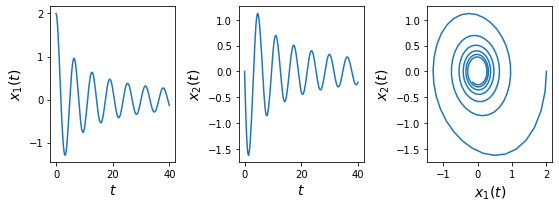

Generating animation (Please wait) ... 

<Figure size 432x288 with 0 Axes>

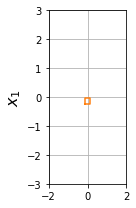

In [23]:
# 初期条件を表すベクトル
x0 = [
    2,  #初期変位 
    0,  #初速度
]

# パラメータを表すベクトル
param = [
    1,   # m
    1,   # k
    0.2, # alpha
]

# 時間軸を表す等差数列
ts = np.linspace(0,40,200) #ちょっと長めに0〜40秒を200等分

# 数値解を求めて表示
all_plot(EOM_air, param, x0, ts)

### 空気抵抗による減衰の特徴

* 大振幅のときは急減衰しますが，少振幅になると減衰が弱まり，なかなか止まりません．2次関数なので．
